In [150]:
import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV


#For Clasification Model Built
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

In [151]:
# For Algorithm

from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [152]:
# Read the dataset csv files and create pandas datframes

train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print("Train and Test data sets are imported successfully")

Train and Test data sets are imported successfully


## 1. Data Analysis and Exploration

### 1.1 Explore Data

In [153]:
# Define a function to explore the train and test dataframes

def explore_data(df):
    print("-"*100)
    print("Shape of dataframe: ",df.shape)
    print("Number of records in data set",df.shape[0])
    print("Information of Dataset")
    df.info()
    print("-"*100)
    print("First 5 records of dataset:")
    return df.head(10)
    print("-"*100)


In [154]:
explore_data(train_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (7613, 5)
Number of records in data set 7613
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [155]:
explore_data(test_df)

----------------------------------------------------------------------------------------------------
Shape of dataframe:  (3263, 4)
Number of records in data set 3263
Information of Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
----------------------------------------------------------------------------------------------------
First 5 records of dataset:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


### 1.2 Missing Values

In [156]:
#Calculate count and percentage of missing values in the dataframe

def missing_values(df):
    print("Number of records with missing location: ",df.location.isnull().sum())
    print("Number of records with missing keywords: ",df.keyword.isnull().sum())
    print("-"*100)
    print("{}% of location values are missing ".format(round((df.location.isnull().sum())/ (df.shape[0]) * 100),2))
    print("{}% of keyword values are missing".format(round((df.keyword.isnull().sum())/(df.shape[0]) *100 ),2))
    msno.matrix(df)

Number of records with missing location:  2533
Number of records with missing keywords:  61
----------------------------------------------------------------------------------------------------
33.0% of location values are missing 
1.0% of keyword values are missing


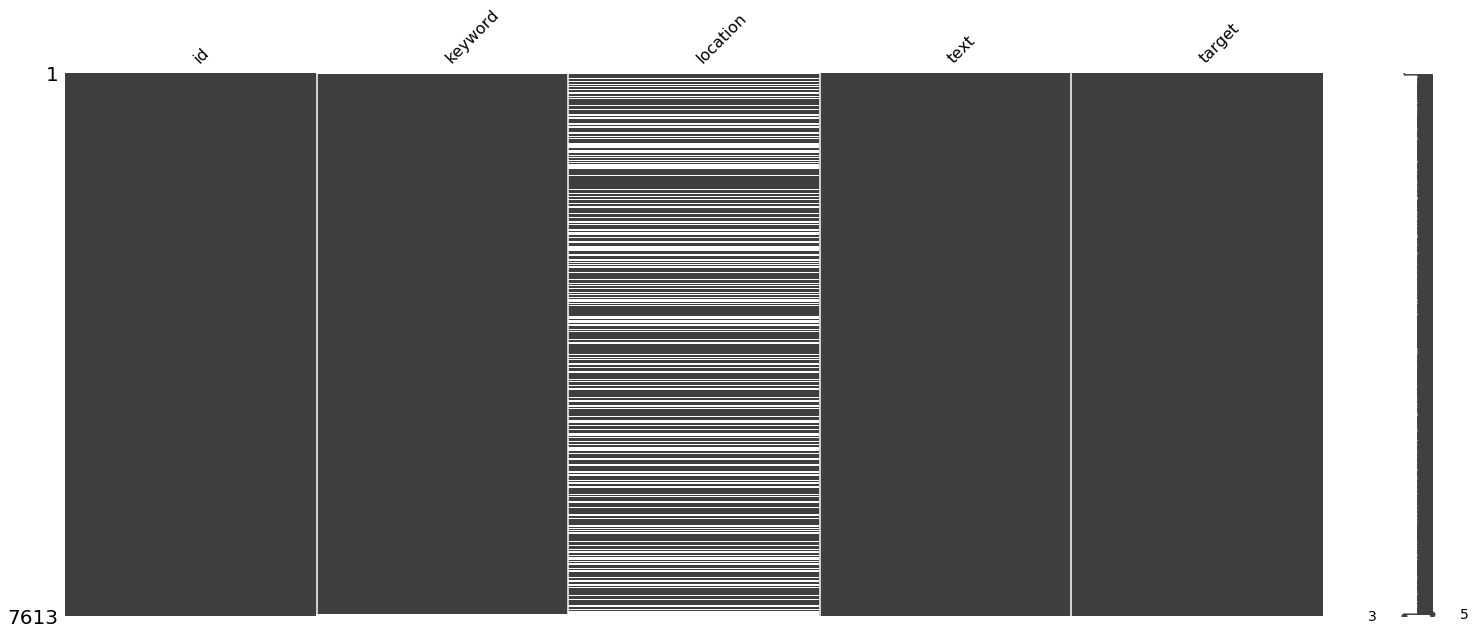

In [157]:
missing_values(train_df)

Number of records with missing location:  1105
Number of records with missing keywords:  26
----------------------------------------------------------------------------------------------------
34.0% of location values are missing 
1.0% of keyword values are missing


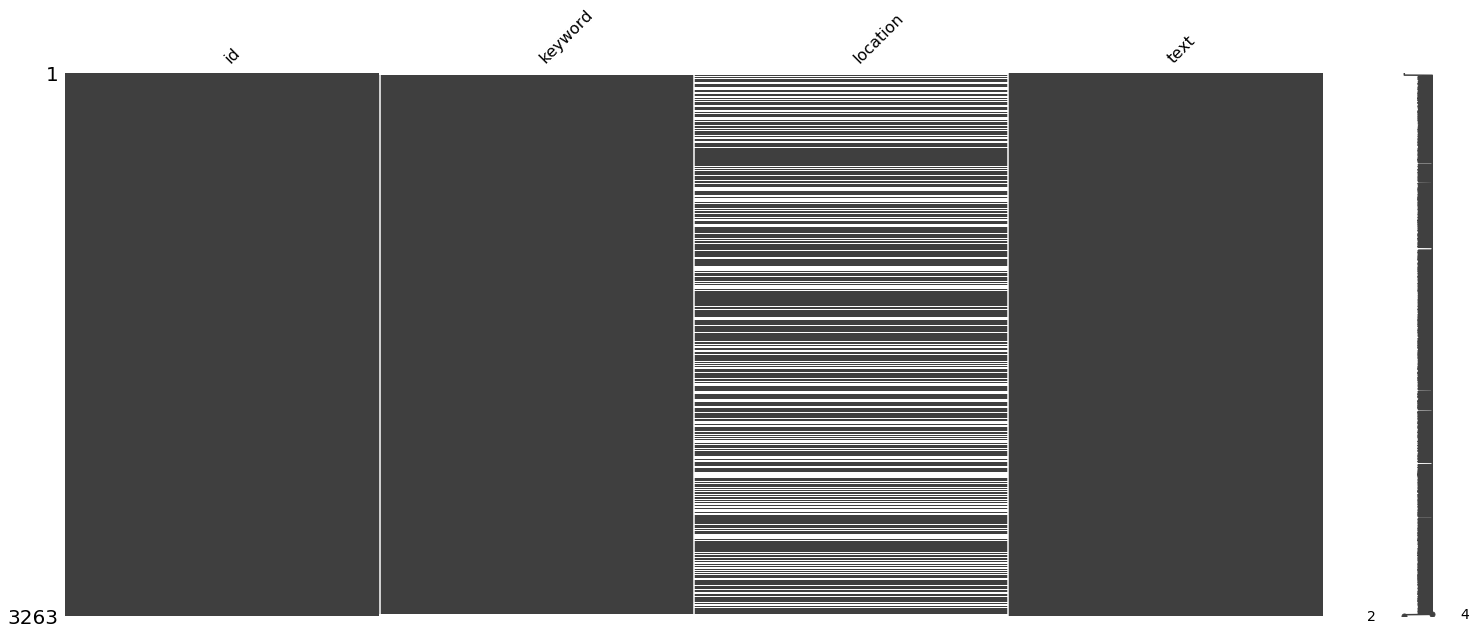

In [158]:
missing_values(test_df)

### 1.3 Visulaization Dataframe

In [159]:
#let visulaize dataframe features useing dataframe

def feature_viz(df,feature):
    
    if feature == 'target':
        sns.countplot(feature, data=df)
        temp1 = df[feature].value_counts()[0]
        temp2 = len(df[feature])
        temp3 = (temp1/temp2)*100

        temp4 = df[feature].value_counts()[1]
        temp5 = (temp4/temp2)*100
        print('Target of 0 is {} % of total'.format(round(temp3)))
        print('Target of 1 is {} % of total'.format(round(temp5)))
    
    else:
        feat = df[feature].value_counts()
        print(feat.head())
        fig = px.scatter(feat,x=feat.values, y=feat.index, size=feat.values)
        fig.show()
        
        
    

Target of 0 is 57.0 % of total
Target of 1 is 43.0 % of total


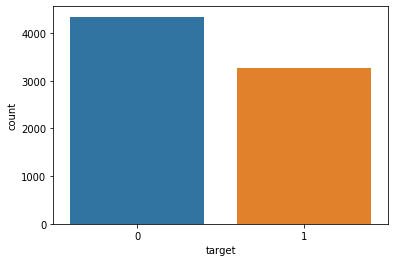

In [160]:
feature_viz(train_df,'target')

In [161]:
feature_viz(train_df,'keyword')

fatalities    45
deluge        42
armageddon    42
sinking       41
harm          41
Name: keyword, dtype: int64


In [162]:
feature_viz(train_df,'location')

USA              104
New York          71
United States     50
London            45
Canada            29
Name: location, dtype: int64


### 1.4 Top Country Based on Tweet

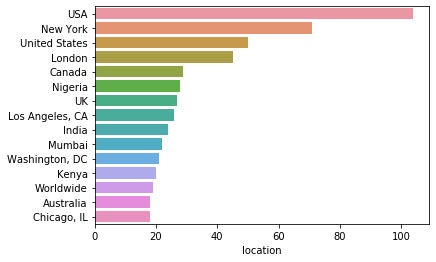

In [163]:
#This Visulization Will Show Top 15 Place Of Tweet
sns.barplot(y=train_df['location'].value_counts()[:15].index,x=train_df['location'].value_counts()[:15],orient='h')

### 1.5 Word & Text Length Count

In [164]:
# Add Two New Column Text Length and Word Count
train_df['text_length'] = train_df['text'].apply(lambda x: len(x))
train_df['word_count'] = train_df['text'].str.split().map(lambda x: len(x))
train_df.head(10)

,id,keyword,location,text,target,text_length,word_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110,18
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95,14
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59,15
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79,12
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52,10


In [165]:
train_df.text_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

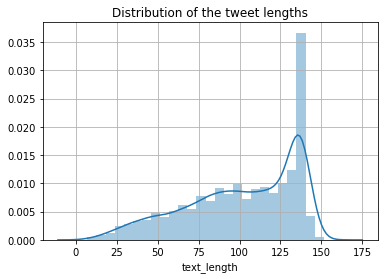

In [166]:
sns.distplot(train_df['text_length']).set_title('Distribution of the tweet lengths')
plt.grid(True)

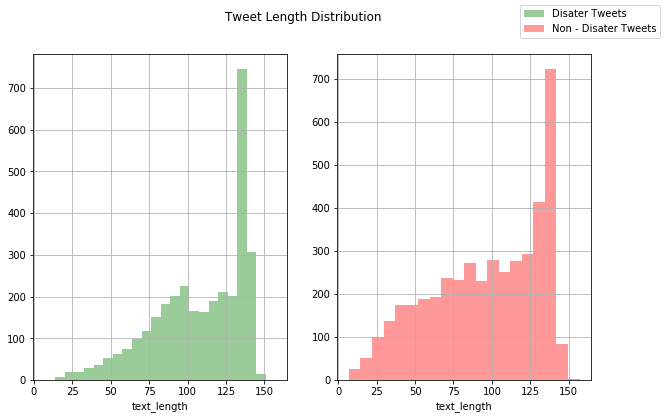

In [167]:
# Make Two Plot For Disater & Not-Disater Tweet Based on Text Length

f, (ax1, ax2) = plt.subplots(1,2, sharex=True,figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['text_length'], ax=ax1, kde=False, color='green',label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['text_length'], ax = ax2, kde=False, color = 'red', label ='Non - Disater Tweets')
f.suptitle('Tweet Length Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

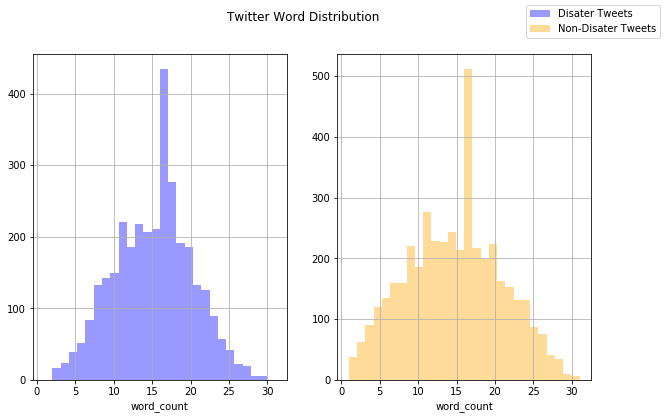

In [168]:
f, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,6))
sns.distplot(train_df[(train_df['target'] == 1)]['word_count'],ax=ax1, kde=False,color="blue",label='Disater Tweets')
sns.distplot(train_df[(train_df['target'] == 0)]['word_count'],ax=ax2, kde=False,color="orange",label='Non-Disater Tweets')
f.suptitle('Twitter Word Distribution')
f.legend()
ax1.grid()
ax2.grid()
plt.show()

In [169]:
train_df[train_df['target']==1]['text'][10:20]

10          Three people died from the heat wave so far
11    Haha South Tampa is getting flooded hah- WAIT ...
12    #raining #flooding #Florida #TampaBay #Tampa 1...
13              #Flood in Bago Myanmar #We arrived Bago
14    Damage to school bus on 80 in multi car crash ...
31    @bbcmtd Wholesale Markets ablaze http://t.co/l...
33    #AFRICANBAZE: Breaking news:Nigeria flag set a...
37    INEC Office in Abia Set Ablaze - http://t.co/3...
38    Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...
46    How the West was burned: Thousands of wildfire...
Name: text, dtype: object

In [170]:
train_df[train_df['target']==0]['text'][10:20]

25                       No way...I can't eat that shit
26                                Was in NYC last week!
27                                   Love my girlfriend
28                                            Cooool :)
29                                   Do you like pasta?
30                                             The end!
32    We always try to bring the heavy. #metal #RT h...
34                   Crying out for more! Set me ablaze
35    On plus side LOOK AT THE SKY LAST NIGHT IT WAS...
36    @PhDSquares #mufc they've built so much hype a...
Name: text, dtype: object

In [171]:
train_df['text'][:5]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

## 2. Data Pre-processing

### 2.1 Data Normalization
- Removing URL
- Removing all irrelevant characters (Numbers and Punctuation)
- Convert all characters into lowercase

In [172]:
def clean_text(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [173]:
train_df1=train_df.copy()
test_df1=test_df.copy()


train_df1['text'] = train_df1['text'].apply(lambda x: clean_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: clean_text(x))

In [174]:
def text_after_preprocess(before_text,after_text):
    print("-"*50)
    print("Before Clean Text")
    print("-"*50)
    print(before_text.head(10))
    print("-"*50)
    print("After Clean Text")
    print("-"*50)
    print(after_text.head(10))
    

In [175]:
# text_after_preprocess(test_df['text'],test_df1['text'])
# text_after_preprocess(train_df['text'],train_df1['text'])

### 2.2 Tokenization

In [176]:
# Lets Tokenize the training and the test dataset copies with RegEx tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train_df1['text'] = train_df1['text'].apply(lambda x: tokenizer.tokenize(x))
test_df1['text'] = test_df1['text'].apply(lambda x: tokenizer.tokenize(x))

In [177]:
# train_df1['text'].head(5)
# test_df1['text'].head(5)

### 2.3 Remove Stopwords

In [178]:
# Remove Stop Words Function
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

In [179]:
train_df1['text'] = train_df1['text'].apply(lambda x: remove_stopwords(x))
test_df1['text'] = test_df1['text'].apply(lambda x: remove_stopwords(x))

In [180]:
# train_df1['text'].head(5)
# test_df1['text'].head(5)

### 2.4 Convert the list of tokens into back to the string

In [181]:
def combine_text(text):
    all_text = ' '.join(text)
    return all_text

In [182]:
train_df1['text'] = train_df1['text'].apply(lambda x: combine_text(x))
test_df1['text'] = test_df1['text'].apply(lambda x: combine_text(x))

In [183]:
# test_df1['text'].head(5)
# train_df1['text'].head(5)

### 2.5 Lemmatization

In [184]:
def stem_lem(text):
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(text)
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemm_text =  " ".join(lemmatizer.lemmatize(token) for token in tokens)
    return lemm_text


In [185]:
train_df1['text'] = train_df1['text'].apply(lambda x: stem_lem(x))
test_df1['text'] = test_df1['text'].apply(lambda x: stem_lem(x))

In [186]:
# train_df1['text'].head(10)
# test_df1['text'].head(10)

### 2.6 Word Cloud

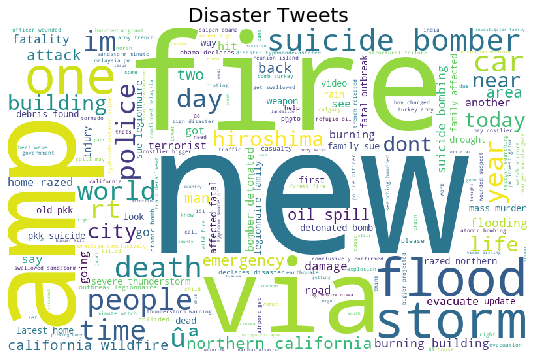

In [187]:
#Lets have a quick look of the tweets in wordcloud
from wordcloud import WordCloud
fig, ax = plt.subplots(figsize=[10, 6])
wordcloud = WordCloud( background_color='white',width=800,height=500).generate(" ".join(train_df1[(train_df1['target'] == 1)]['text']))
ax.imshow(wordcloud)
ax.axis('off')
ax.set_title('Disaster Tweets',fontsize=20);


## 3. Vectorization of text

In [188]:
# Vectorize the text using CountVectorizer
count_vectorizer = CountVectorizer()
train_cv = count_vectorizer.fit_transform(train_df1['text'])
test_cv = count_vectorizer.transform(test_df1["text"])


In [189]:
# Vectorize the text using TFIDF
tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tf = tfidf.fit_transform(train_df1['text'])
test_tf = tfidf.transform(test_df1["text"])

## 4. Built a Text Classification Model

### Model List For Classifire

In [190]:
# models = [LogisticRegression(C=1.0)]

# models = [LogisticRegression(C=1.0),SVC(),MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=5),RandomForestClassifier()]

models = [LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),KNeighborsClassifier(),SVC(class_weight='balanced'), GradientBoostingClassifier(),RandomForestClassifier(),RidgeClassifier(class_weight='balanced'),AdaBoostClassifier(n_estimators=100),MultinomialNB(),Perceptron(class_weight='balanced'),XGBClassifier(n_estimators=300),CatBoostClassifier(verbose=0),KMeans()]


### 4.1 For CountVetorizer

In [191]:
x_train_cv, x_test_cv, y_train_cv, y_test_cv = train_test_split(train_cv, train_df.target, test_size=0.2, random_state=2020)

In [192]:

data_compaire_cv = []
df_compaire_cv = pd.DataFrame(data_compaire_cv, columns = ['Classifier', 'F1-Score', 'Accuracy']) 


In [193]:
def fit_and_predict_cv(count,model,x_train,y_train,x_test,y_test):
    
    clf = model
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)

    # Confusion Matrix
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('-'*100)

    # Classification Report
    print('Classification Report')
    print(classification_report(y_test,predictions))
    print('-'*100)

    # Model
    print("{}".format(model))
    print('-'*100)

    # Training Set Accuracy
    print('Accuracy of classifier on training set: ',clf.score(x_train,y_train))
    print('-'*100)

    # Test Set Accuracy
    print('Accuracy of classifier on test set: ',round(accuracy_score(y_test,predictions) * 100))
    print('-'*100)

    # F1 Score 
    print('F1 of classifier on test set: ', round(f1_score(y_test,predictions,average='weighted'),2))

    # Insert Algorithm Analysis Value Into a Data Frame
    temp1 = f1_score(y_test,predictions,average='weighted')
    temp2 = round(accuracy_score(y_test,predictions) * 100)
    df_compaire_cv.loc[count] = [model,temp1,temp2]

    print('#'*100)
    

In [194]:
count = 0
for model in models:
    count +=1
    fit_and_predict_cv(count,model,x_train_cv,y_train_cv,x_test_cv,y_test_cv)


Confusion Matrix
[[722 127]
 [177 497]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       849
           1       0.80      0.74      0.77       674

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.80      1523
weighted avg       0.80      0.80      0.80      1523

----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------------------------

Accuracy of classifier on training set:  0.986863711001642
----------------------------------------------------------------------------------------------------
Accuracy of classifier on test set:  78.0
----------------------------------------------------------------------------------------------------
F1 of classifier on test set:  0.78
####################################################################################################
Confusion Matrix
[[687 162]
 [191 483]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       849
           1       0.75      0.72      0.73       674

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523

----------------------------------------------------------------------

Accuracy of classifier on training set:  0.8436781609195402
----------------------------------------------------------------------------------------------------
Accuracy of classifier on test set:  78.0
----------------------------------------------------------------------------------------------------
F1 of classifier on test set:  0.77
####################################################################################################
Confusion Matrix
[[  0  18   8   0  38   0  10 775]
 [  0  45   3   7   8   9   6 596]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       849
           1       0.71      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



### 4.2 For TFIDF Vectorizer

In [195]:
#Split TFDIF vectorize data

x_train_tf,x_test_tf,y_train_tf,y_test_tf = train_test_split(train_tf,train_df.target,test_size=0.2,random_state=2020)

In [196]:
data_compaire_tf = []
df_compaire_tf = pd.DataFrame(data_compaire_tf, columns = ['Classifier', 'F1-Score', 'Accuracy'])

In [197]:
def fit_and_predict_tf(count,model,x_train,y_train,x_test,y_test):
    
    clf = model
    clf.fit(x_train, y_train)
    predictions = clf.predict(x_test)
    
    # Confusion Matrix
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('-'*100)

    # Classification Report
    print('Classification Report')
    print(classification_report(y_test,predictions))
    print('-'*100)

    # Model
    print("{}".format(model))
    print('-'*100)

    # Training Set Accuracy
    print('Accuracy of classifier on training set: ',clf.score(x_train,y_train))
    print('-'*100)

    # Test Set Accuracy
    print('Accuracy of classifier on test set: ',round(accuracy_score(y_test,predictions) * 100))
    print('*'*100)

    # F1 Score 
    print('F1 of classifier on test set: ', round(f1_score(y_test,predictions,average='weighted'),2))

    # Insert Algorithm Analysis Value Into a Data Frame
    temp1 = f1_score(y_test,predictions,average='weighted')
    temp2 = '{} %'.format(round(accuracy_score(y_test,predictions) * 100))
    df_compaire_tf.loc[count] = [model,temp1,temp2]

    print('#'*100)

In [198]:
count = 0
for model in models:
    count +=1
    fit_and_predict_tf(count,model,x_train_tf,y_train_tf,x_test_tf,y_test_tf)

Confusion Matrix
[[720 129]
 [171 503]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       849
           1       0.80      0.75      0.77       674

    accuracy                           0.80      1523
   macro avg       0.80      0.80      0.80      1523
weighted avg       0.80      0.80      0.80      1523

----------------------------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------------------------

Accuracy of classifier on training set:  0.983743842364532
----------------------------------------------------------------------------------------------------
Accuracy of classifier on test set:  78.0
****************************************************************************************************
F1 of classifier on test set:  0.78
####################################################################################################
Confusion Matrix
[[676 173]
 [160 514]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       849
           1       0.75      0.76      0.76       674

    accuracy                           0.78      1523
   macro avg       0.78      0.78      0.78      1523
weighted avg       0.78      0.78      0.78      1523

----------------------------------------------------------------------

Accuracy of classifier on training set:  0.8504105090311986
----------------------------------------------------------------------------------------------------
Accuracy of classifier on test set:  77.0
****************************************************************************************************
F1 of classifier on test set:  0.76
####################################################################################################
Confusion Matrix
[[ 50 695  18   5  16  46  19   0]
 [ 43 498  10  15  25  25  44  14]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.54      0.06      0.11       849
           1       0.42      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [199]:
df_compaire_tf.sort_values(by=['F1-Score'],ascending=False)

,Classifier,F1-Score,Accuracy
1,"LogisticRegression(C=1.0, class_weight='balanc...",0.802230,80.0 %
4,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.795623,80.0 %
9,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.790600,80.0 %
7,"RidgeClassifier(alpha=1.0, class_weight='balan...",0.781553,78.0 %
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.779377,78.0 %
11,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.772508,78.0 %
8,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.771173,77.0 %
12,<catboost.core.CatBoostClassifier object at 0x...,0.764357,77.0 %
10,"Perceptron(alpha=0.0001, class_weight='balance...",0.735012,74.0 %
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.733648,73.0 %


In [200]:
df_compaire_cv.sort_values(by=['F1-Score'],ascending=False)

,Classifier,F1-Score,Accuracy
1,"LogisticRegression(C=1.0, class_weight='balanc...",0.799404,80.0
9,"MultinomialNB(alpha=1.0, class_prior=None, fit...",0.799002,80.0
4,"SVC(C=1.0, break_ties=False, cache_size=200, c...",0.795007,80.0
11,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.794085,80.0
6,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.775989,78.0
2,"DecisionTreeClassifier(ccp_alpha=0.0, class_we...",0.772790,77.0
12,<catboost.core.CatBoostClassifier object at 0x...,0.768824,78.0
7,"RidgeClassifier(alpha=1.0, class_weight='balan...",0.767619,77.0
8,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.763858,77.0
10,"Perceptron(alpha=0.0001, class_weight='balance...",0.759515,76.0


## 5. Best Classifire

In [201]:
# After all classifires test LogisticRegression() with TfidfVectorizer work best

clf_logreg = LogisticRegression(C=1.0)
clf_logreg.fit(x_train_tf, y_train_tf)
prediction = clf_logreg.predict(x_test_tf)
confusion_matrix(y_test_tf,prediction)
print(classification_report(y_test_tf,prediction))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       849
           1       0.85      0.66      0.74       674

    accuracy                           0.80      1523
   macro avg       0.81      0.79      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [202]:
clf_logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Submission File

In [203]:
def submission(file_loc,model,text_vector):
    
    sub_df = pd.read_csv(file_loc)
    sub_df['target'] = model.predict(text_vector)
    sub_df.to_csv("submisstion.csv",index=False)

In [204]:
file_loc = 'data/sample_submission.csv'
test_vector = test_tf
submission(file_loc,clf_logreg,test_vector)